<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Binomial_ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grid Search MLE estimate: p_hat = 0.440
Optimization MLE estimate: p_hat = 0.43591


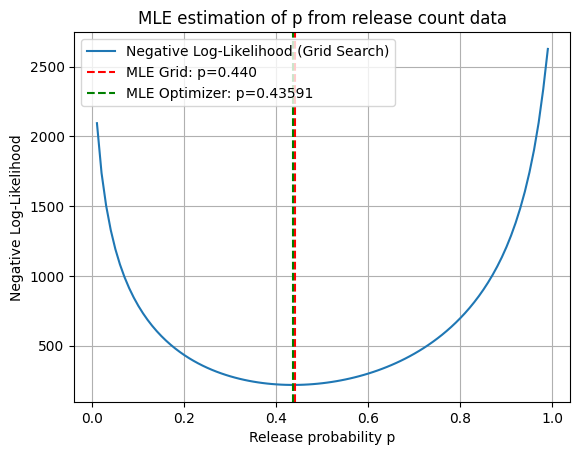

In [1]:
# From same sets of experiment#3
# 100 experiements, where we have a set of data
#Measured releases	Count
#Meassured Release / Counts
#0	0
#1	0
#2	3
#3	7
#4	10
#5	19
#6	26
#7	16
#8	16
#9	5
#10	5
#11	0
#12	0
#13	0
#14	0

#What is the likely value of p that reprepresents the maximum-likelihood
#estimate of a parameter in the population given our sample with a
#resolution of 0.01?
#BONUS: Use a fitting procedure to find p

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
# Data
n = 14
k_values = np.arange(0, n+1)  # 0 to 14 number of possible quanta released
#number of counts per release
counts = np.array([0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0])
# Function to compute negative log-likelihood (for minimization)
#Calculates the negative log-likelihood of the data for a candidate release probability
#Negative because most optimization routines minimize, and MLE maximizes log-likelihood.
def neg_log_likelihood(p):
    # Avoid log(0) by bounding p
    if p <= 0 or p >= 1:
        return np.inf
    pmf_vals = binom.pmf(k_values, n, p)
    # Log-likelihood: sum over k of count_k * log P(k|p)
    log_likelihood = np.sum(counts * np.log(pmf_vals + 1e-12))  # add small number to avoid log(0)
    return -log_likelihood  # minimize negative log-likelihood

# 1) Grid search over p in [0,1] with resolution 0.01
#Tests values from 0.01 to 0.99 in steps of 0.01,
#calculates negative log-likelihood, and picks the bestp
p_grid = np.arange(0.01, 1.0, 0.01)
neg_ll_grid = np.array([neg_log_likelihood(p) for p in p_grid])
best_p_grid = p_grid[np.argmin(neg_ll_grid)]

print(f"Grid Search MLE estimate: p_hat = {best_p_grid:.3f}")

# 2) Use scipy.optimize to find precise minimum (BONUS)
#Grid search checks likelihood at discrete points — limited resolution.
#minimize_scalar uses smart algorithms (like Brent's method) to
#find the minimum more precisely and efficiently.
res = minimize_scalar(neg_log_likelihood, bounds=(0.001, 0.999), method='bounded')
print(f"Optimization MLE estimate: p_hat = {res.x:.5f}")

# Plot negative log-likelihood vs p
plt.plot(p_grid, neg_ll_grid, label='Negative Log-Likelihood (Grid Search)')
plt.axvline(best_p_grid, color='red', linestyle='--', label=f'MLE Grid: p={best_p_grid:.3f}')
plt.axvline(res.x, color='green', linestyle='--', label=f'MLE Optimizer: p={res.x:.5f}')
plt.xlabel('Release probability p')
plt.ylabel('Negative Log-Likelihood')
plt.title('MLE estimation of p from release count data')
plt.legend()
plt.grid(True)
plt.show()

#You have a function telling you “how bad” (negative log-likelihood) each is at explaining your data.
#You want to find the where this "badness" is the smallest.
#minimize_scalar automatically tries values in your allowed range to find that sweet spot.

